In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

## Loading csv data into pandas dataframe

In [2]:
loan_df = pd.read_csv('loan.csv', low_memory=False)

In [3]:
# Fetch top 5 rows in the dataframe

loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# info() prints information about the dataframe

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# Displaying the number of entries in the dataframe

len(loan_df.index)

39717

In [6]:
# Displaying the number of rows and columns in the dataframe

loan_df.shape

(39717, 111)

## Data cleaning

### Drop all the columns which are having more than 50% of null values

In [7]:
loan_df.dropna(axis = 'columns', thresh = len(loan_df.index)/2, inplace = True)

In [8]:
loan_df.shape

(39717, 54)

Number of columns for analysis came down from 111 to 54

In [9]:
# Check if there are any duplicates rows with same id or member_id in given data

print('Number of duplicate rows = {}'.format(loan_df.duplicated(subset=['id', 'member_id'], keep='last').sum()))

Number of duplicate rows = 0


In [10]:
# Fetch all the columns which has null entries

null_columns = loan_df.columns[loan_df.isnull().any()]
print('Following columns has some entries as NULL {}'.format(null_columns))


Following columns has some entries as NULL Index(['emp_title', 'emp_length', 'desc', 'title', 'revol_util',
       'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


#### Out of the following columns following can be removed as they are just description and will not add any value to our analysis

emp_title: The job title supplied by the Borrower when applying for the loan. \
desc: Loan description provided by the borrower. \
title: The loan title provided by the borrower.


In [11]:
# Dropping columns emp_title, desc, title

loan_df.drop(['emp_title', 'desc', 'title'], axis = 1, inplace = True)

In [12]:
loan_df.shape

(39717, 51)

Number of columns for analysis came down from 111 to 51

#### We can drop all the columns which can take only one unique value as they may not add any value to our analysis

In [13]:
columns_with_one_unique_value = []
for col in loan_df.columns:
    # Do not consider nan in unique values
    if (len(loan_df[col].dropna().unique()) == 1):
        columns_with_one_unique_value.append(col)
print(columns_with_one_unique_value)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [14]:
loan_df.drop(columns_with_one_unique_value, axis = 1, inplace = True)

In [15]:
loan_df.shape

(39717, 42)

Number of columns for analysis came down from 111 to 42

In [16]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [17]:
# Check no; of null values per each column

loan_df.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_py

In [18]:
# #Seems like 'pub_rec_bankruptcies' is important one... so, lets mark it as unknown.
# loan_df.dropna(axis = 'index', how = 'any', inplace = True)

In [19]:
# Out of these columns which are having null values, we can drop last_credit_pull_d, last_pymnt_d and revol_util as revol_util
# as they are customer behaviour variables and will not contribute to credit analysis

loan_df.drop(['last_credit_pull_d', 'last_pymnt_d', 'revol_util'], axis = 1, inplace = True)

In [20]:
# Impute missing values in 'pub_rec_bankruptcies' and 'emp_length' columns

loan_df.emp_length = loan_df.emp_length.fillna(loan_df.emp_length.mode()[0])
loan_df.pub_rec_bankruptcies = loan_df.pub_rec_bankruptcies.fillna('Unknown')

In [21]:
# Verify whether all rows with null entries are removed or not.

loan_df.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late

In [22]:
# Fetch one entry so that we can apply further cleaning on data based on value types

loan_df.iloc[1]

id                                                                   1077430
member_id                                                            1314167
loan_amnt                                                               2500
funded_amnt                                                             2500
funded_amnt_inv                                                       2500.0
term                                                               60 months
int_rate                                                              15.27%
installment                                                            59.83
grade                                                                      C
sub_grade                                                                 C4
emp_length                                                          < 1 year
home_ownership                                                          RENT
annual_inc                                                           30000.0

In [23]:
# Cleaning up the values for int_rate and converting it to float type
def clean_percent_string (percent_string):
    return float(percent_string.replace('%',''))
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: clean_percent_string(x))
loan_df.rename(columns={"int_rate": "int_rate (in %)"}, inplace = True)

In [24]:
# url column data may not add any value for the analysis as url is just a concatenation of 
# https://lendingclub.com/browse/loanDetail.action? and loan_id. Hence dropping that column

loan_df.drop(['url'], axis = 1, inplace = True)

In [25]:
len(loan_df['id'].unique())

39717

In [26]:
len(loan_df['member_id'].unique())

39717

In [27]:
# Since id and member_id both are unique for each entry, we can drop any of these column.
# Hence dropping member_id column

loan_df.drop(['member_id'], axis = 1, inplace = True)

In [28]:
# Change types of following ['issue_d', 'earliest_cr_line'] columns to datetime

def change_columns_type_to_datetime (dataframe, list_of_columns):
    for column in list_of_columns:
        dataframe[column] = pd.to_datetime(dataframe[column].str.upper(), format='%b-%y')
change_columns_type_to_datetime (loan_df, ['issue_d', 'earliest_cr_line'])

In [29]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   loan_amnt                39717 non-null  int64         
 2   funded_amnt              39717 non-null  int64         
 3   funded_amnt_inv          39717 non-null  float64       
 4   term                     39717 non-null  object        
 5   int_rate (in %)          39717 non-null  float64       
 6   installment              39717 non-null  float64       
 7   grade                    39717 non-null  object        
 8   sub_grade                39717 non-null  object        
 9   emp_length               39717 non-null  object        
 10  home_ownership           39717 non-null  object        
 11  annual_inc               39717 non-null  float64       
 12  verification_status      39717 n

Remove customer 

In [30]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate (in %),installment,grade,sub_grade,emp_length,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,...,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,...,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0


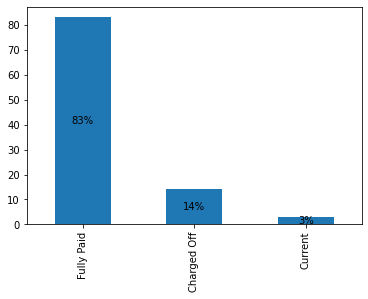

In [31]:
ax = (loan_df['loan_status'].value_counts(normalize = True)*100).plot.bar()
for c in ax.containers:
        labels = [str(round(v.get_height()))+'%' if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')

#### Observations:
1. Maximum number of loans are fully paid
2. 83% of loans are fully paid. 14% of loans applicants has not paid the instalments in due time for a long period of    time and 3% of loans installment are still in progress. 

In [32]:
# derived variable issue_year, issue_month from issue_date. This might give us some significance impact on which year
# and month more loans are issued

loan_df['issue_year'] = loan_df['issue_d'].dt.year
loan_df['issue_month'] = loan_df['issue_d'].dt.month

### Handling continuous variable


In [33]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate (in %)', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies', 'issue_year', 'issue_month'],
      dtype='object')

In [34]:
# For now, considering all columns which are not of type object and datetime as continuos columns. From the result
# another round of filtering is added based on domain knowledge and unique values that columns take.

numerical_columns = []
for i in loan_df.columns:
    if loan_df[i].dtype!="object" and loan_df[i].dtype!="datetime64[ns]":
        numerical_columns.append(i)
print(numerical_columns, '\n') 

# From the above list we can exclude id, issue_year, delinq_2yrs, pub_rec_bankruptcies, pub_rec,
# inq_last_6mths as they are not continuos. [Verified by printing unique values of these columns]

numerical_columns = list(set(numerical_columns) - set(['id', 'issue_year', 'delinq_2yrs',
                                                      'pub_rec_bankruptcies', 'pub_rec', 'inq_last_6mths']))
# Further filtered numerical columns
print(numerical_columns)


['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate (in %)', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'issue_year', 'issue_month'] 

['loan_amnt', 'issue_month', 'out_prncp', 'out_prncp_inv', 'revol_bal', 'recoveries', 'total_rec_prncp', 'total_rec_late_fee', 'int_rate (in %)', 'last_pymnt_amnt', 'open_acc', 'funded_amnt_inv', 'total_acc', 'dti', 'installment', 'funded_amnt', 'total_rec_int', 'annual_inc', 'total_pymnt_inv', 'total_pymnt', 'collection_recovery_fee']


### Outlier detection and removal using Z score

In [35]:
# z-score is calculated for every value with respect to their columns
z = np.abs(stats.zscore(loan_df[numerical_columns]))

# Add loan_status to this segmented dataframe as this column might be useful for us later for analysis on loan_status
numerical_columns.append('loan_status')

# Removal of all rows which contain outliers
loan_num_df = loan_df[numerical_columns][(z < 3).all(axis=1)]

In [36]:
loan_num_df.head()

,loan_amnt,issue_month,out_prncp,out_prncp_inv,revol_bal,recoveries,total_rec_prncp,total_rec_late_fee,int_rate (in %),last_pymnt_amnt,...,total_acc,dti,installment,funded_amnt,total_rec_int,annual_inc,total_pymnt_inv,total_pymnt,collection_recovery_fee,loan_status
0,5000,12,0.00,0.00,13648,0.00,5000.00,0.00,10.65,171.62,...,9,27.65,162.87,5000,863.16,24000.0,5833.84,5863.155187,0.00,Fully Paid
1,2500,12,0.00,0.00,1687,117.08,456.46,0.00,15.27,119.66,...,4,1.00,59.83,2500,435.17,30000.0,1008.71,1008.710000,1.11,Charged Off
2,2400,12,0.00,0.00,2956,0.00,2400.00,0.00,15.96,649.91,...,10,8.72,84.33,2400,605.67,12252.0,3005.67,3005.666844,0.00,Fully Paid
3,10000,12,0.00,0.00,5598,0.00,10000.00,16.97,13.49,357.48,...,37,20.00,339.31,10000,2214.92,49200.0,12231.89,12231.890000,0.00,Fully Paid
4,3000,12,524.06,524.06,27783,0.00,2475.94,0.00,12.69,67.79,...,38,17.94,67.79,3000,1037.39,80000.0,3513.33,3513.330000,0.00,Current


array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'issue_month'}>,
        <AxesSubplot:title={'center':'out_prncp'}>,
        <AxesSubplot:title={'center':'out_prncp_inv'}>,
        <AxesSubplot:title={'center':'revol_bal'}>],
       [<AxesSubplot:title={'center':'recoveries'}>,
        <AxesSubplot:title={'center':'total_rec_prncp'}>,
        <AxesSubplot:title={'center':'total_rec_late_fee'}>,
        <AxesSubplot:title={'center':'int_rate (in %)'}>,
        <AxesSubplot:title={'center':'last_pymnt_amnt'}>],
       [<AxesSubplot:title={'center':'open_acc'}>,
        <AxesSubplot:title={'center':'funded_amnt_inv'}>,
        <AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'installment'}>],
       [<AxesSubplot:title={'center':'funded_amnt'}>,
        <AxesSubplot:title={'center':'total_rec_int'}>,
        <AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplo

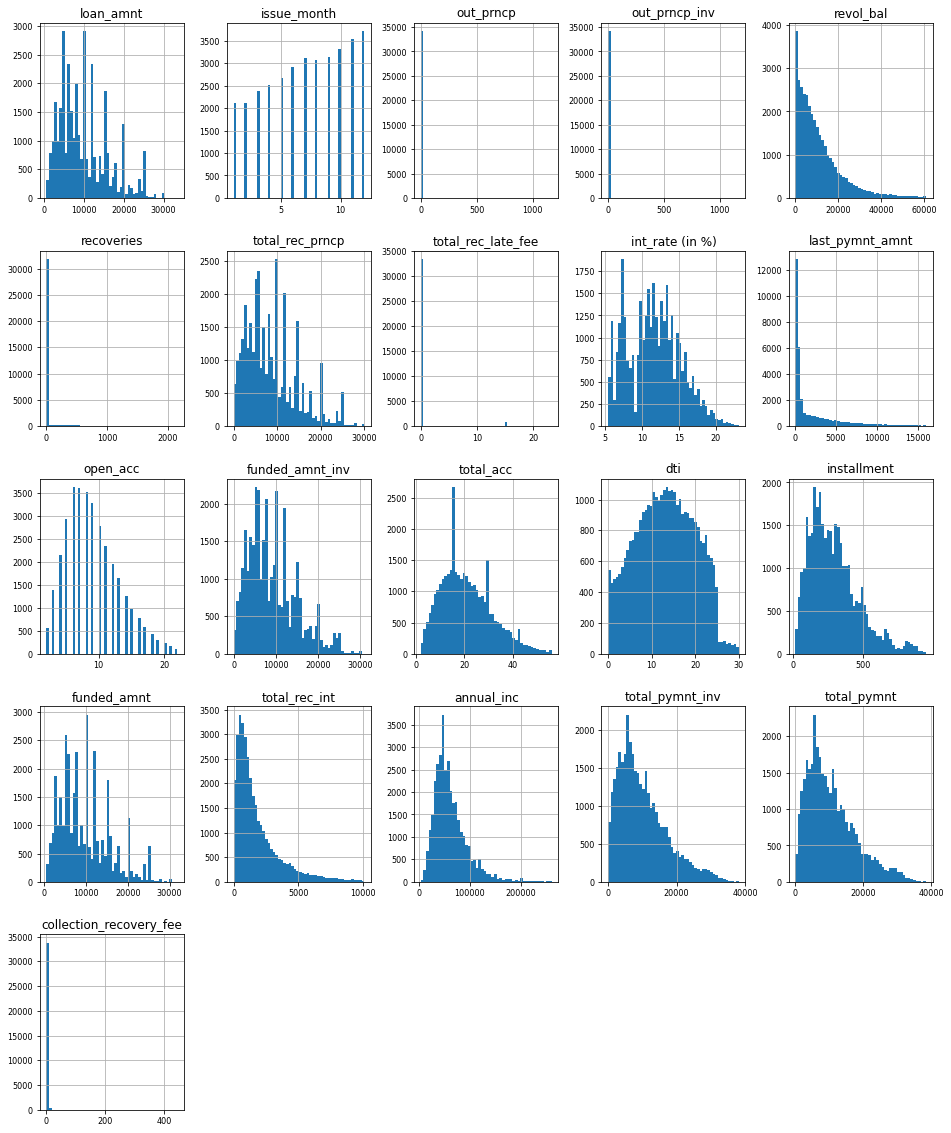

In [37]:
loan_num_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Observations:

From the above graph, we can observe that particular range of annual_inc, loan_amnt, revol_bal and total_acc has a significant impact of number of loan applicants. Lets try to anylise these columns by converting this continuous attributes into catogorical attrubutes.

##### Lets convert few of these continuos attributes to catogorical attributes for further analysis

In [38]:
# To analyse the loan count on income, let us check the distribution of incomes among the applicants

loan_num_df['annual_inc'].describe()

count     34607.000000
mean      62208.415177
std       33288.519359
min        4000.000000
25%       39996.000000
50%       55000.000000
75%       76411.000000
max      260000.000000
Name: annual_inc, dtype: float64

In [39]:
# Crate different bins to catogorise annual incomes into different bins

loan_num_df["annual_inc_bins"] = pd.cut(loan_num_df['annual_inc'], np.linspace(0, 260000, 14))

In [40]:
# To analyse the loan count on loan amount, let us check the distribution of loan amounts among the applicants

loan_num_df['loan_amnt'].describe()

count    34607.000000
mean      9900.645823
std       6036.987823
min        500.000000
25%       5000.000000
50%       8875.000000
75%      13750.000000
max      33425.000000
Name: loan_amnt, dtype: float64

In [41]:
# Crate different bins to catogorise loan amounts into different bins

loan_num_df["loan_amnt_bins"] = pd.cut(loan_num_df['loan_amnt'], np.linspace(725, 33425, 16))

In [42]:
# To analyse the loan count on total_acc, let us check the distribution of total_acc among the applicants

loan_num_df['total_acc'].describe()

count    34607.000000
mean        21.028462
std         10.518927
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         56.000000
Name: total_acc, dtype: float64

In [43]:
# Crate different bins to catogorise total_acc into different bins

loan_num_df["total_acc_bins"] = pd.cut(loan_num_df['total_acc'], np.linspace(2, 56, 7))

In [44]:
# To analyse the loan count on interest_rate, let us check the distribution of interest_rate among the applicants

loan_num_df['int_rate (in %)'].describe()

count    34607.000000
mean        11.646858
std          3.526697
min          5.420000
25%          8.880000
50%         11.490000
75%         13.990000
max         23.130000
Name: int_rate (in %), dtype: float64

In [45]:
# Lets round of interest rates

loan_num_df["int_rate_bins"] = round(loan_num_df['int_rate (in %)'])

In [46]:
# To analyse the loan count on DTI, let us check the distribution of DTI among the applicants

loan_num_df['dti'].describe()

count    34607.00000
mean        13.19699
std          6.68061
min          0.00000
25%          8.03000
50%         13.25000
75%         18.45000
max         29.99000
Name: dti, dtype: float64

In [47]:
# Crate different bins to catogorise dti into different bins

loan_num_df["dti_bins"] = pd.cut(loan_num_df['dti'], np.linspace(0, 30, 7))

### Univariate analysis on Catogorical variables


In [48]:
def display_bar_chart(loan_df, column_name):
    ax = (loan_df[column_name].value_counts(normalize=True)*100).plot.bar(figsize=(15, 8))
    for c in ax.containers:
        labels = [str(round(v.get_height()))+'%' if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')

In [49]:
# Funtion to display stacked bar chart by creating a crossed tabulation between loan status and given column.
# This will help to analyse impact of a given attribute on loan_status

def display_stacked_bar_chart (loan_df1, column_name):
    loan_df_filtered = loan_df1[loan_df1.loan_status != 'Current']
    ax = (pd.crosstab(index=loan_df_filtered[column_name],columns=loan_df['loan_status'], normalize = "index")*100).plot.bar(stacked = True, figsize=(20, 8))
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    ax.set_xlabel(column_name, fontsize=12)
    for c in ax.containers:
        
        # If the segment is small or 0, customize the labels
        labels = [str(int(v.get_height()))+'%' if v.get_height() > 0 else '' for v in c]

        # remove the labels parameter if it's not needed for customized labels
        ax.bar_label(c, labels=labels, label_type='center')

### Analysis on verification_status

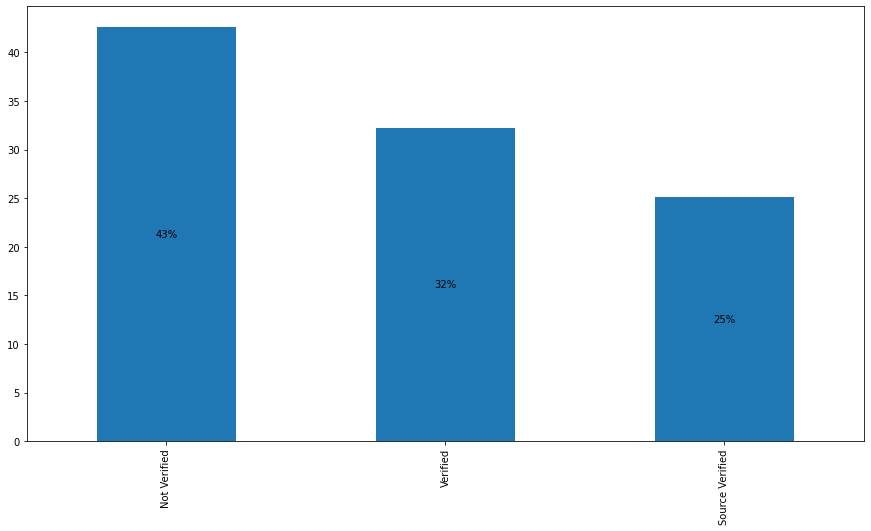

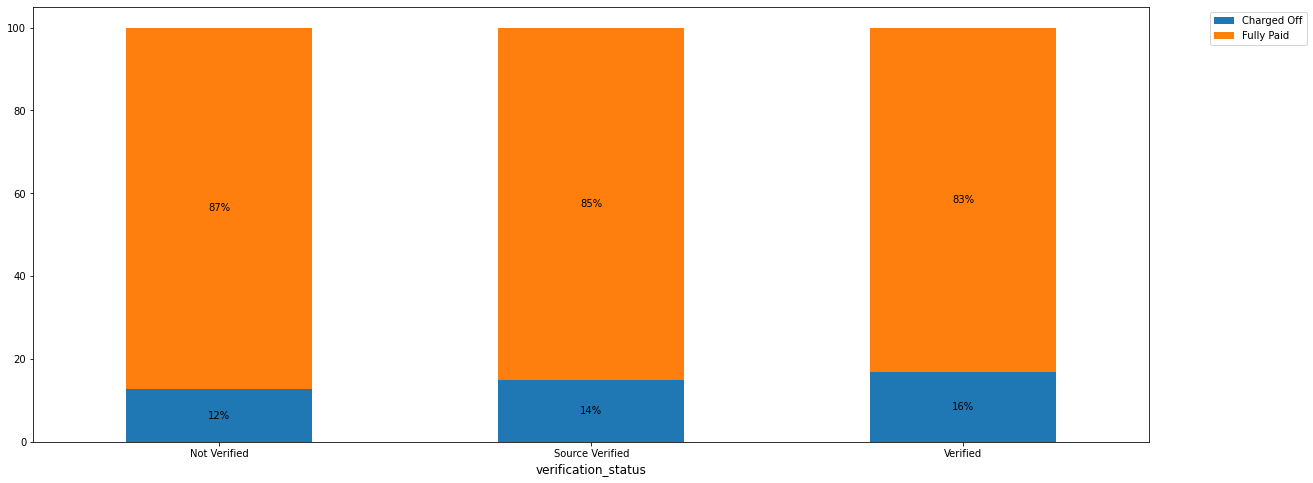

In [50]:
display_bar_chart(loan_df, 'verification_status')

# Cross tabulation between Loan Status and Verfication Status
display_stacked_bar_chart(loan_df, 'verification_status')
plt.xticks(rotation=0)
plt.show()

#### Observation
1. There are more non verified loans than verified loans. In general, non verfied loan may result in defaults. This might be risky.
2. Verified loan amounts are more Charged Off than unverified loan amounts. This is something unexpected. We need to investigate further in bivariate/multivariate analysis

### Analysis on pub_rec_bankruptcies

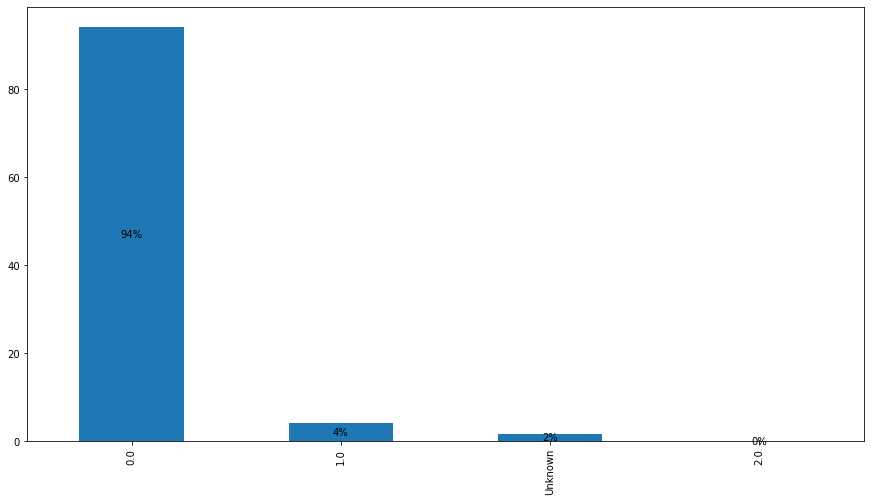

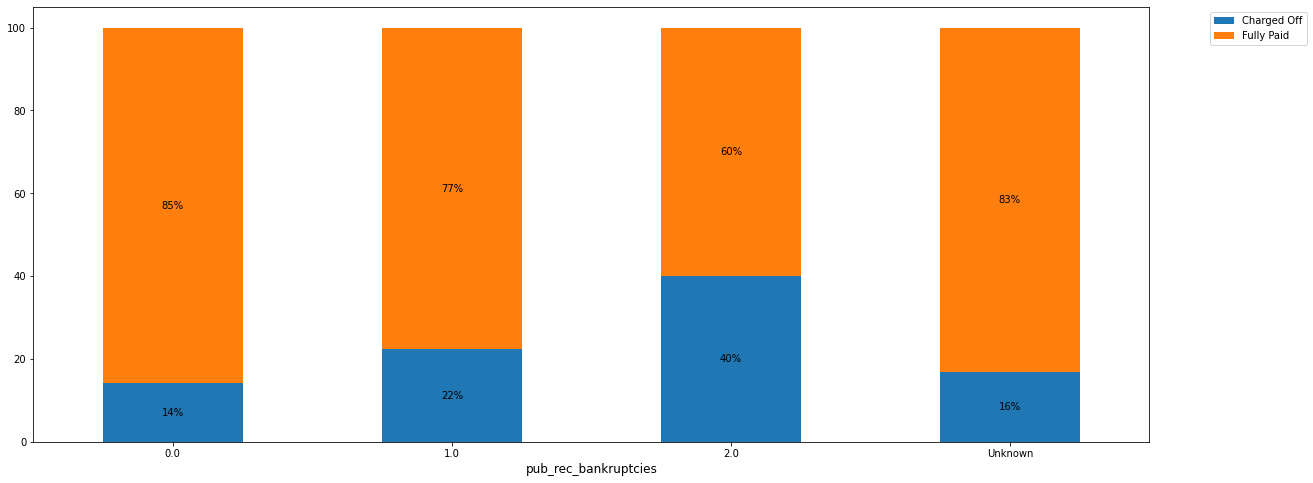

In [51]:
display_bar_chart(loan_df, 'pub_rec_bankruptcies')

# Cross tabulation between Loan Status and Verfication Status
display_stacked_bar_chart(loan_df, 'pub_rec_bankruptcies')
plt.xticks(rotation=0)
plt.show()

#### Observation:
1. Percentage of charged off is higher for the applicants having previous record of bankruptcy. Company should consider not issueing loans with previous record of bankruptcy as they may not loose much as they are very less in number or should increase interest rate. 
2. May be its better to analyse interest rate with previous record of bankruptcy. Interest rate should be high for applicants having previous record of bankruptcy.

### Analysis on term

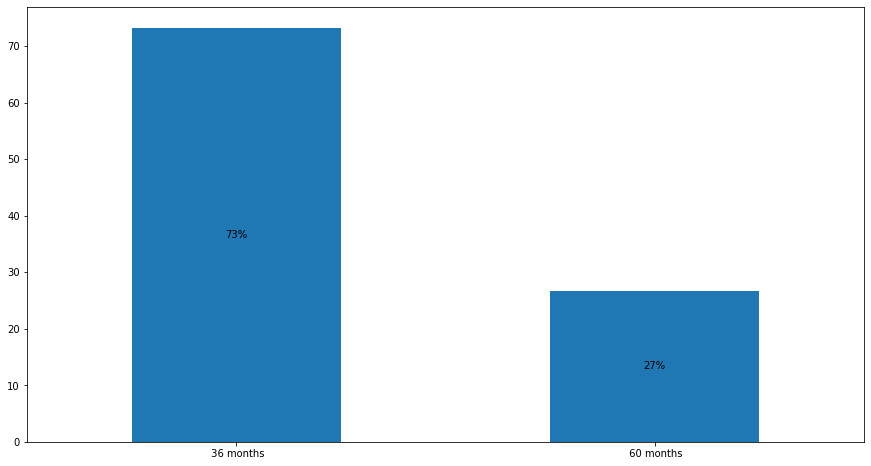

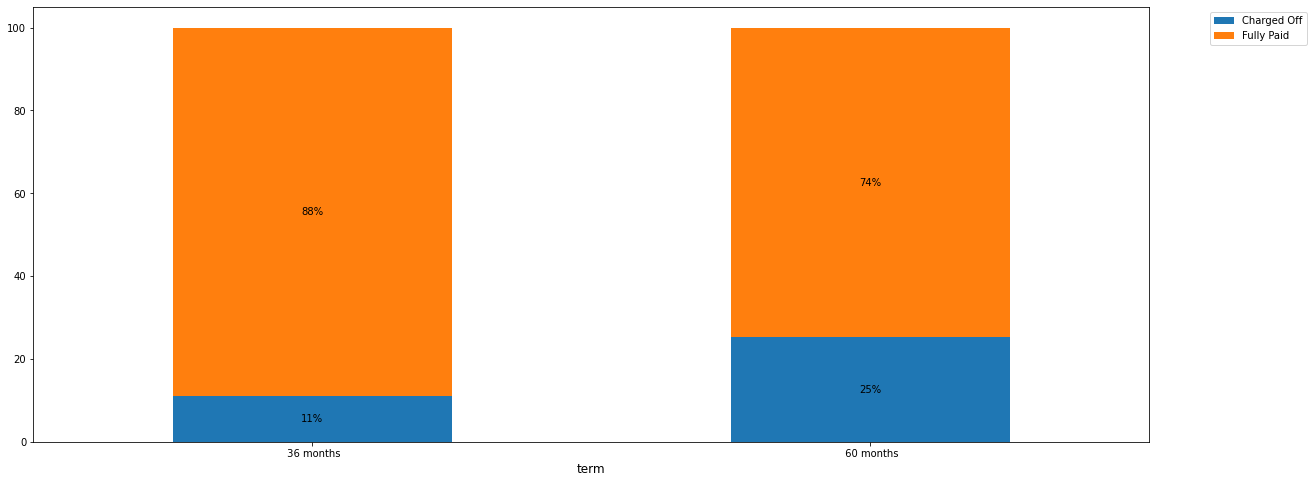

In [52]:
display_bar_chart(loan_df, 'term')
plt.xticks(rotation=0)

# Cross tabulation between Loan Status and term (months)

display_stacked_bar_chart(loan_df, 'term')
plt.xticks(rotation=0)
plt.show()

#### Observation
1. 73% of total loans were given to duration of 36 months while 26% were given to 60 months.
2. Around 15% increase in Charged off percentage for the loans alloted for 60 months. From this we can conclude that higher term loan has the higher chance of default.

### Analysis on grade

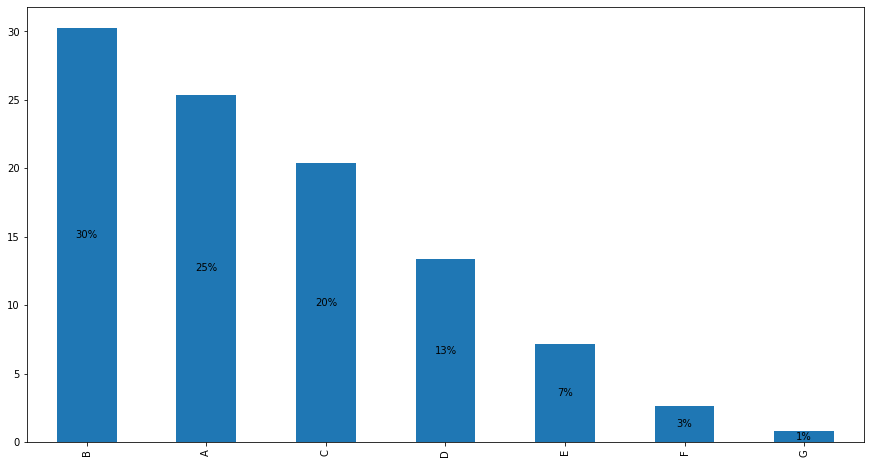

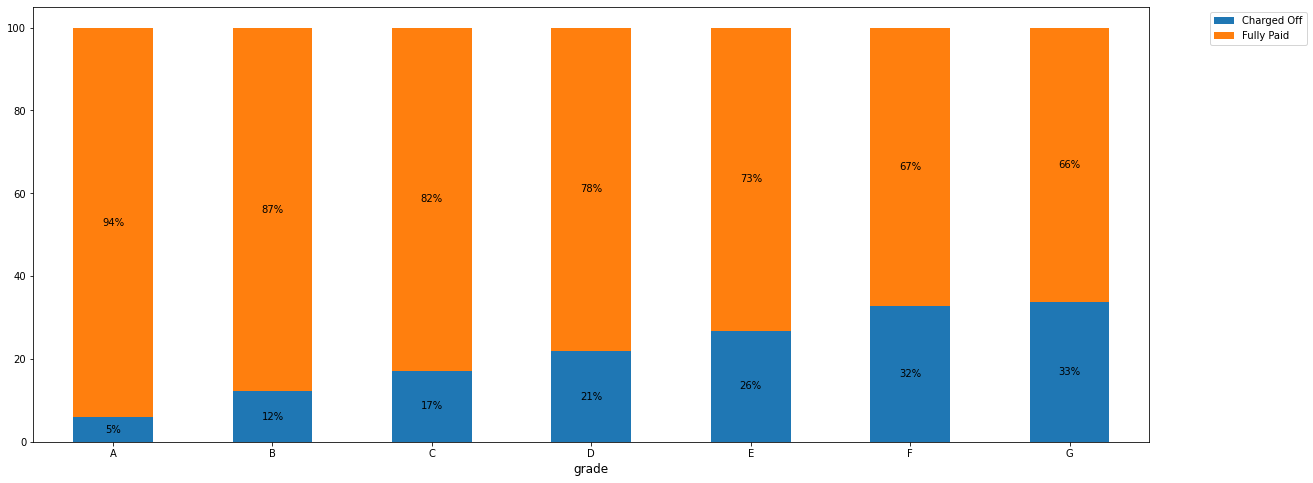

In [53]:
display_bar_chart(loan_df, 'grade')

# Cross tabulation between Loan Status and term (months)

display_stacked_bar_chart(loan_df, 'grade')
plt.xticks(rotation=0)
plt.show()

#### Observation
1. Grade A and Grade B looks safe. Even though the percentage of applicants from grades A and B are higher, charge off percentage is low.
2. Almost 33% of loans of Grade F and Grade G are default and less in number as well. Company should consider not issueing loans for these grade. There would be no much impact if we completely avoid issueing loans for these grades are they are very less in number.
3. May be its better to analyse interest rate with grades. Interest rate should be high for applicants having grades F and G.

### Analysis on sub_grade

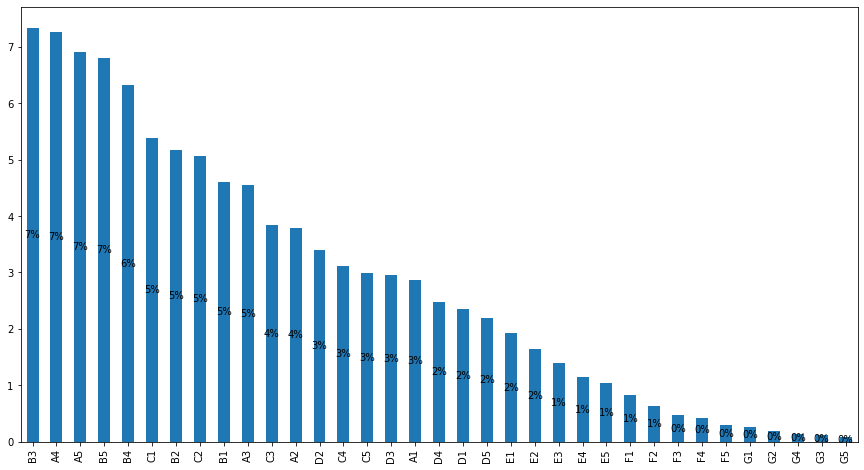

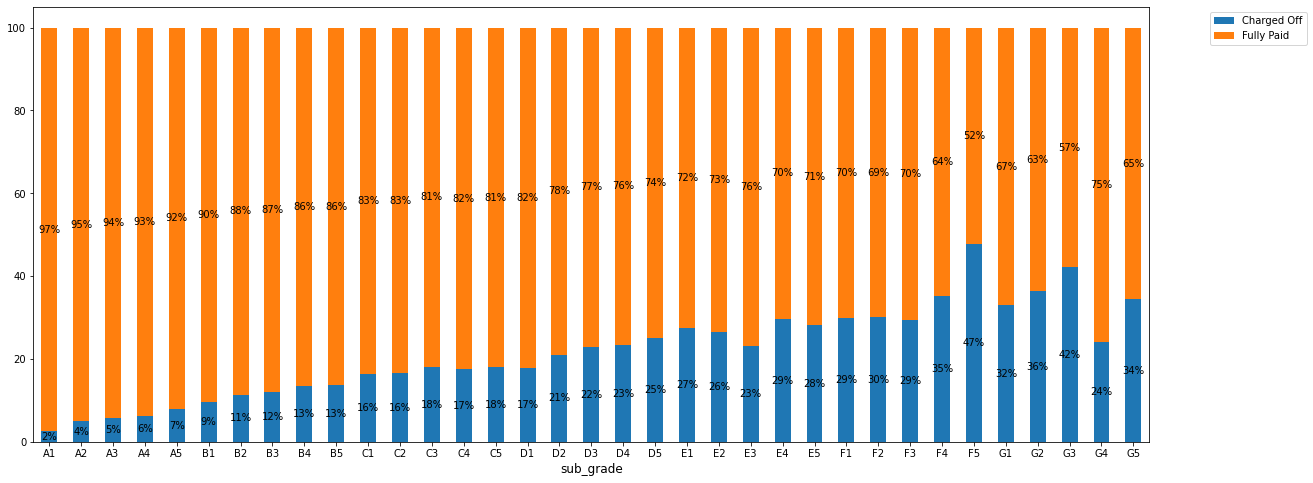

In [54]:
display_bar_chart(loan_df, 'sub_grade')

# Cross tabulation between Loan Status and term (months)

display_stacked_bar_chart(loan_df, 'sub_grade')
plt.xticks(rotation=0)
plt.show()

### Observation
1. Trend for the sub_grade and grade looks similar and we need to do bivariate analysis of this column on interest rate if company is charging high interest rates on sub grades falls under F and G grades.

### Analysis on emp_length

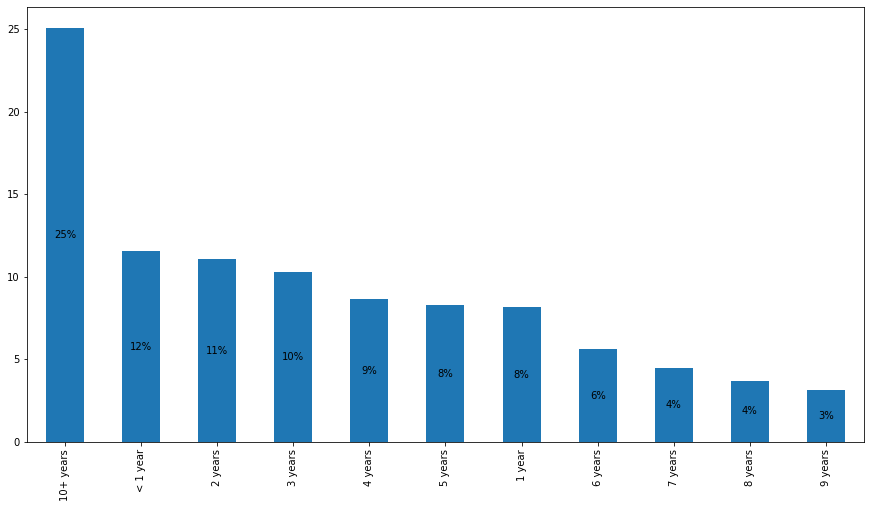

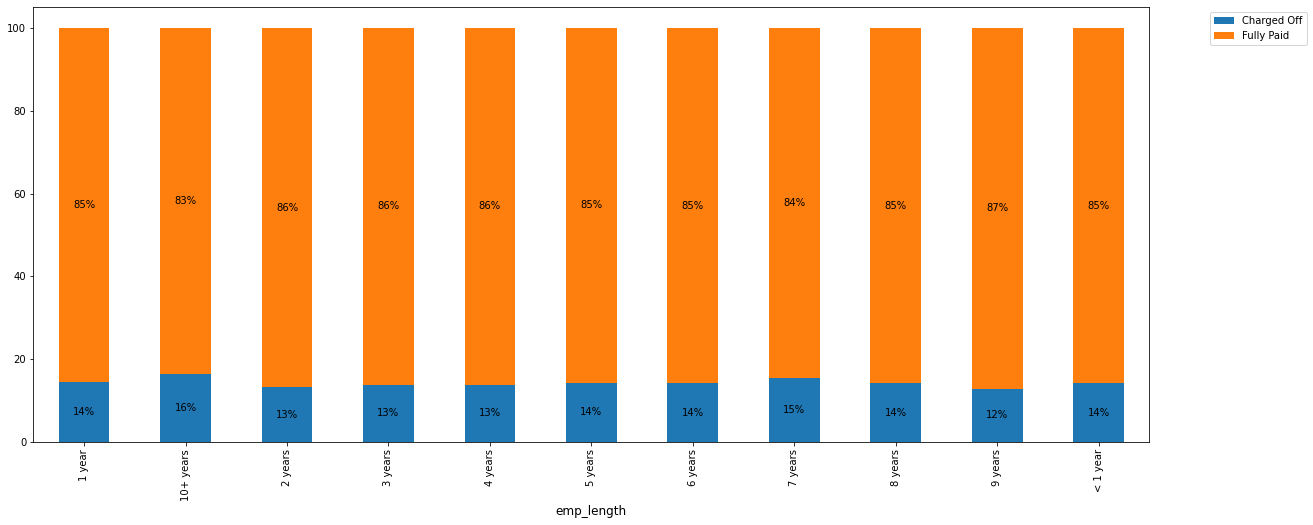

In [55]:
display_bar_chart(loan_df, 'emp_length')

# Cross tabulation between Loan Status and emp_length

display_stacked_bar_chart(loan_df, 'emp_length')
plt.show()

#### Observation

1. Charged off percentage is almost same for all values of employee length. From this we can conclude that employee length doesn't have much impact on loan default.

### Analysis on home_ownership

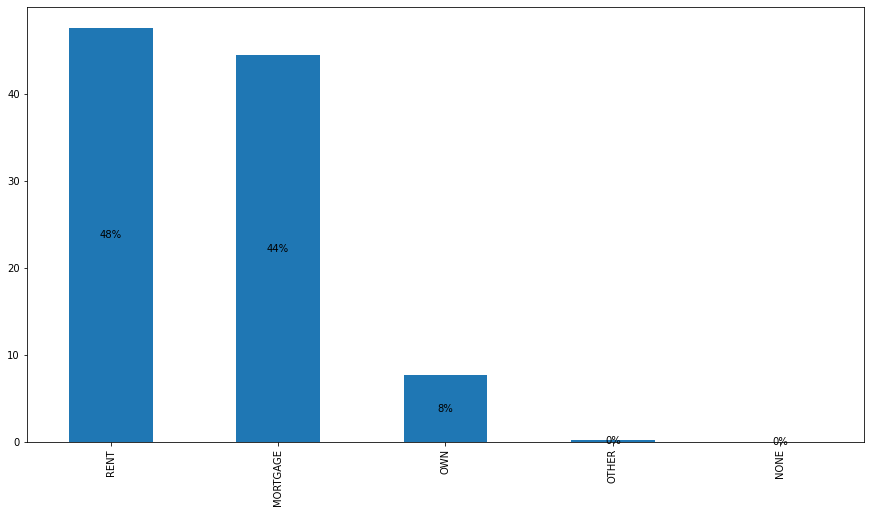

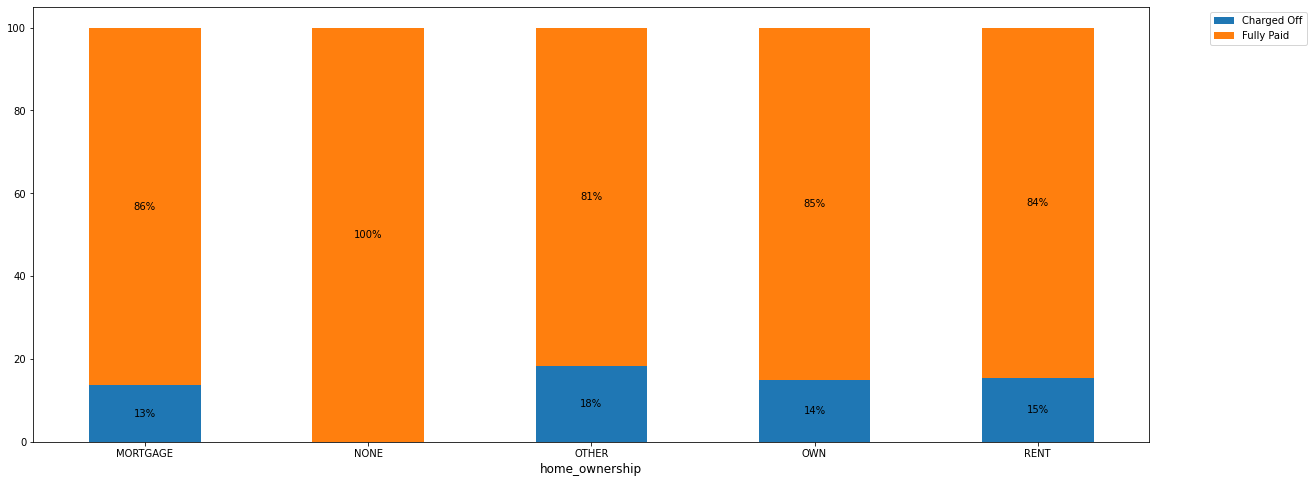

In [56]:
# (loan_df['home_ownership'].value_counts(normalize=True)*100).plot.bar()
display_bar_chart(loan_df, 'home_ownership')

# Cross tabulation between Loan Status and home_ownership

display_stacked_bar_chart(loan_df, 'home_ownership')
plt.xticks(rotation=0)
plt.show()

#### Observation
1. Charge off percentage is almost same for all catogories. And non of the applicants having home_ownership as NONE is charged off. But we cannot make any conclusions from this as applicants with home_ownership NONE is very less.

### Analysis on purpose

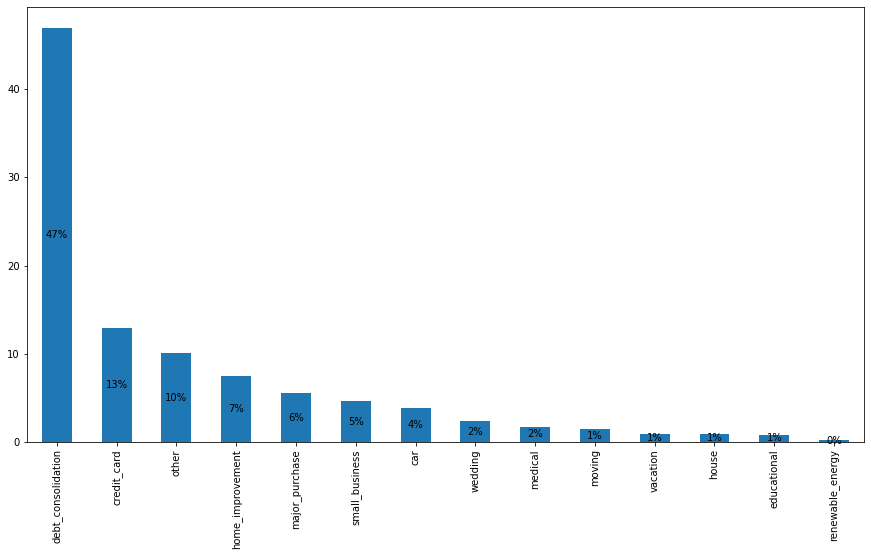

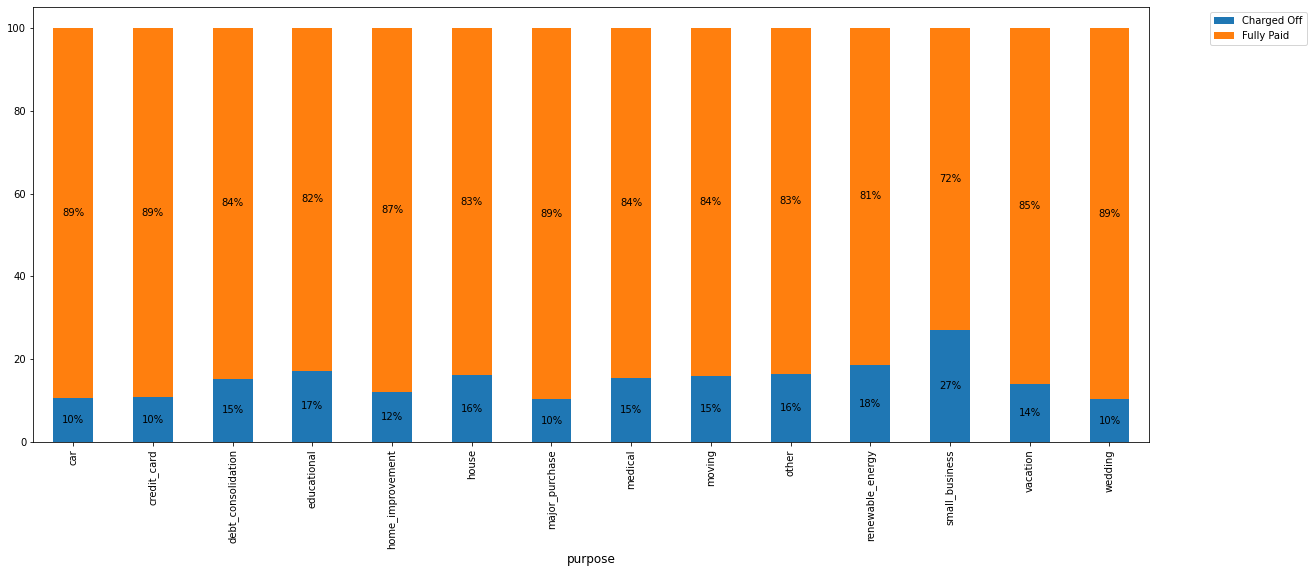

In [57]:
display_bar_chart(loan_df, 'purpose')

# Cross tabulation between Loan Status and purpose

display_stacked_bar_chart(loan_df, 'purpose')
plt.show()

#### Observation
1. Around 47% of loans were issued for debt_consolidation.
2. Around 27% of loans for small_bussiness is charged off. This is a most risky pupose.
3. 17 to 18% of loans for education and renewable_energy has been charged off. But this seems not risky as percentage of loans for these purpose also seems low.

### Analysis on addr_state

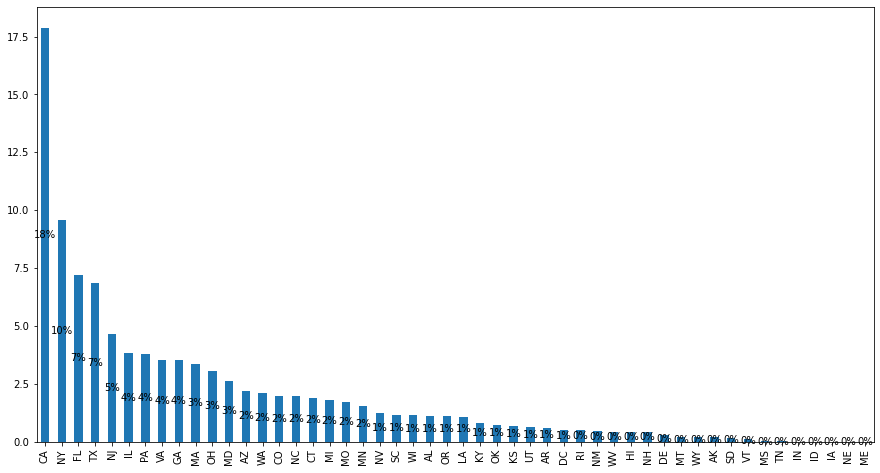

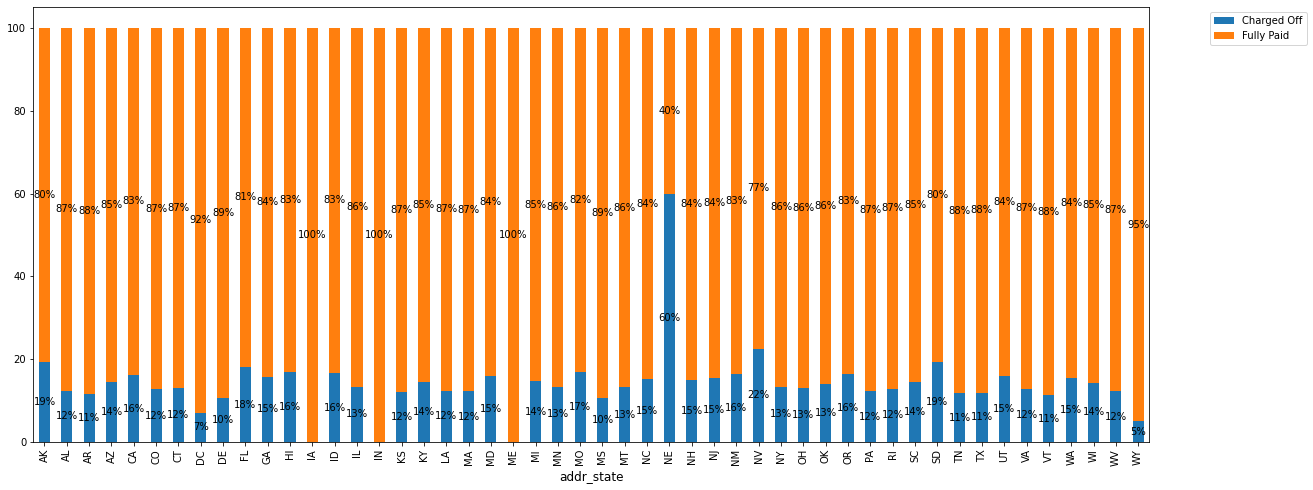

In [58]:
display_bar_chart(loan_df, 'addr_state')

# Cross tabulation between Loan Status and addr_state

display_stacked_bar_chart(loan_df, 'addr_state')
plt.show()

#### Observation
1. Maximum loans are from CA (around 18%) followed by NY (around 10%), FL (around 7%) and TX (around 7%)
2. More number of loans are issued to the countries having coastal region. 
3. States with higher charge off percent are significantly less loan counts. Hence this attribute may not play a significant role and overall this doesn't have much impact on default.

### Analysis on issue_year

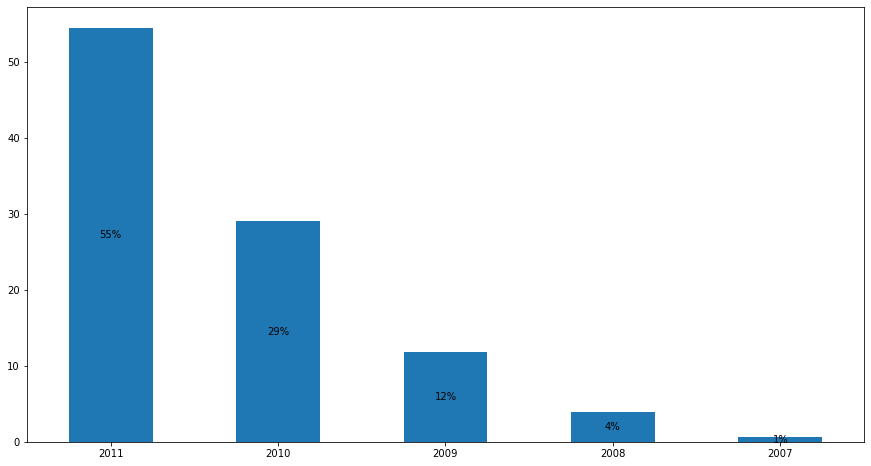

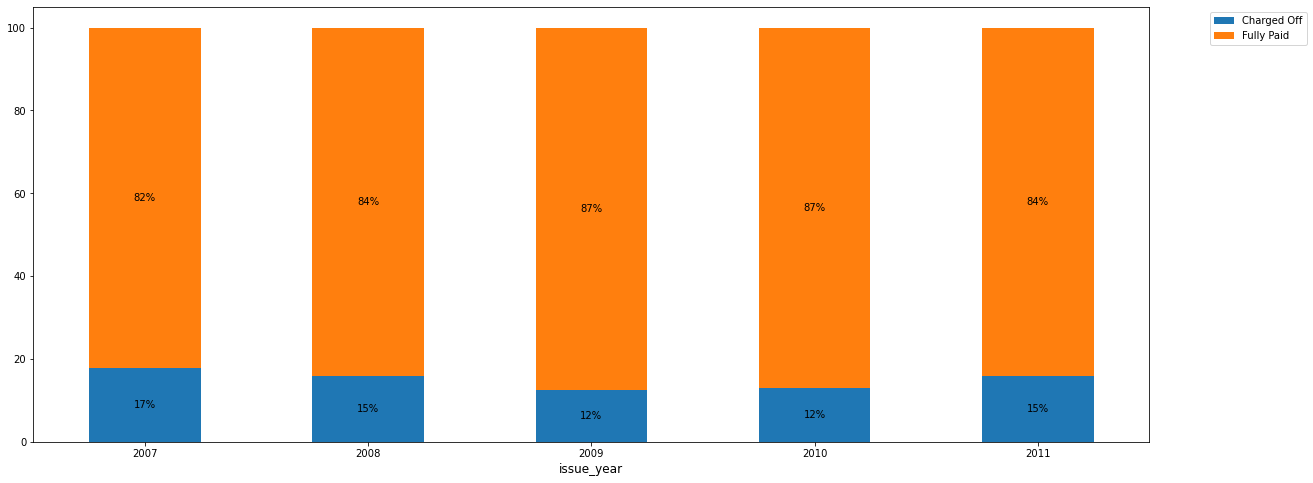

In [59]:
display_bar_chart(loan_df, 'issue_year')
plt.xticks(rotation=0)

# Cross tabulation between Loan Status and issue_year

display_stacked_bar_chart(loan_df, 'issue_year')
plt.xticks(rotation=0)
plt.show()

#### Observation
1. The number of loans issued by the company has increased over the years.
2. Charge off percentage is almost same for all years available in the data base. Hence we can conclude that year doesn't have much significance on loan default.

### Analysis on issue_month

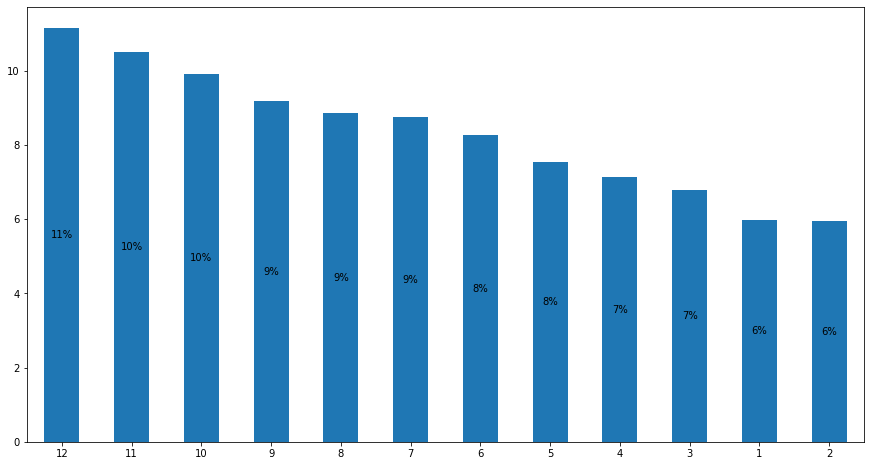

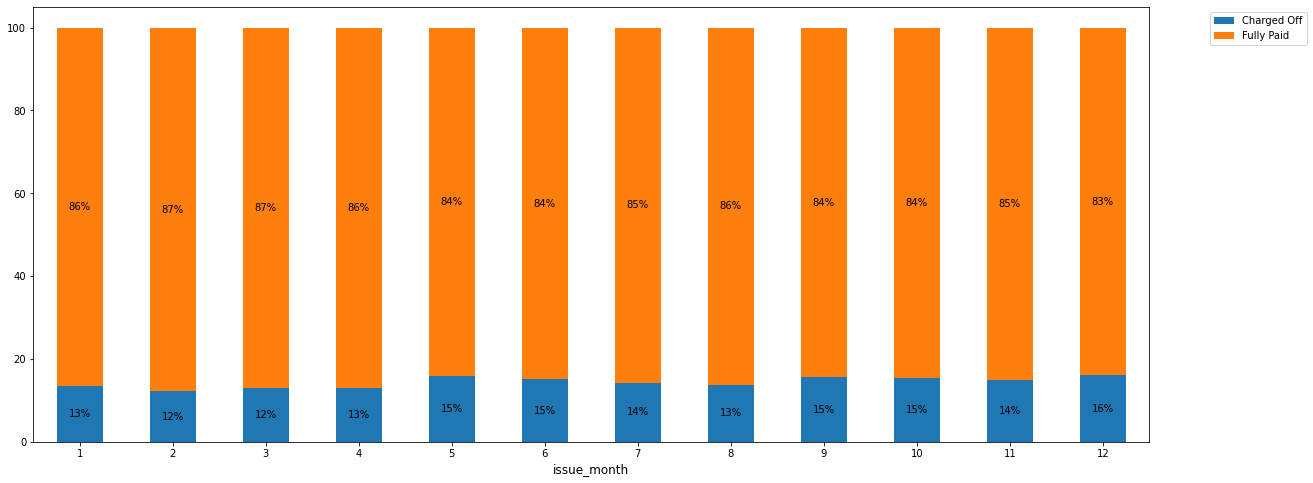

In [60]:
display_bar_chart(loan_df, 'issue_month')
plt.xticks(rotation=0)

# Cross tabulation between Loan Status and issue_month

display_stacked_bar_chart(loan_df, 'issue_month')
plt.xticks(rotation=0)
plt.show()

1. The number of loans issued by the company has is very high in November and December.
2. Charge off percentage is almost same for all years available in the data base. Hence we can conclude that month doesn't have much significance on loan default.

### Univariate analysis on continuous variables (converted to catogorical by creating bins earlier)

### Analysis on annual_inc

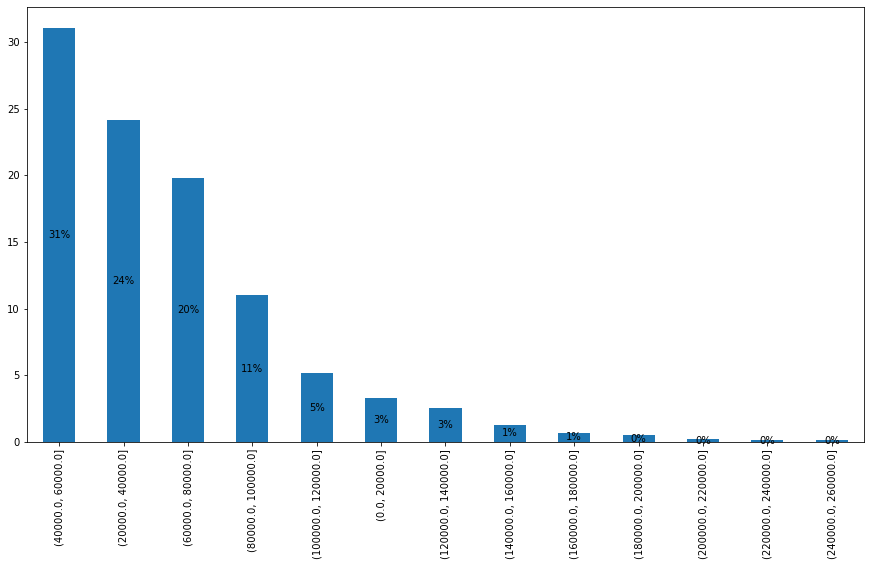

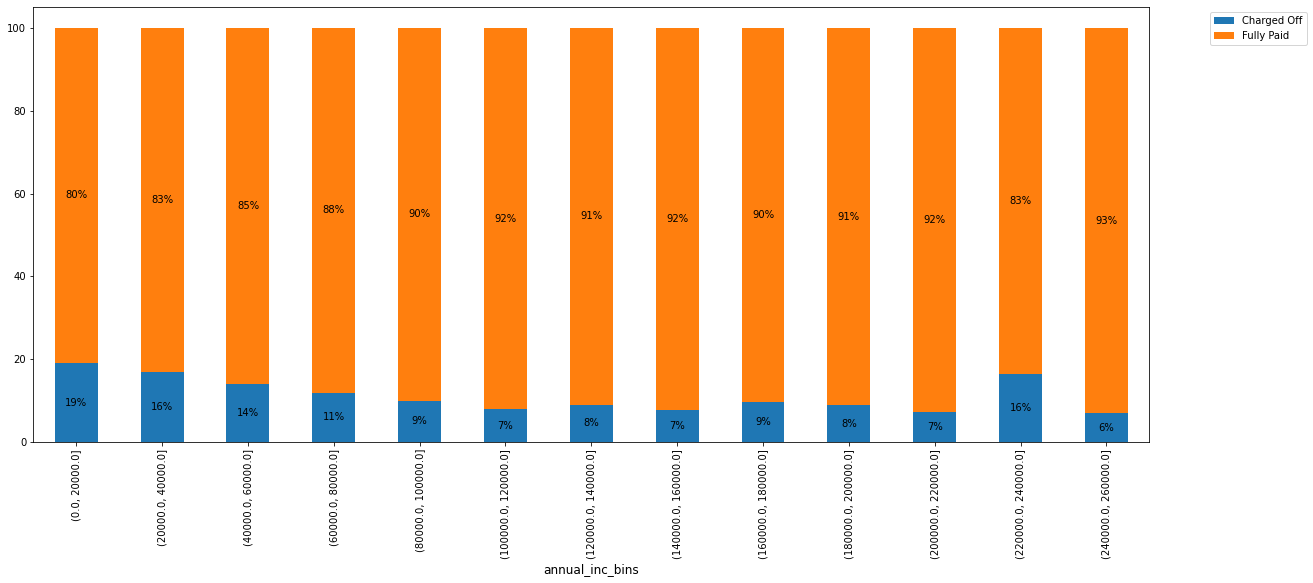

In [61]:
display_bar_chart(loan_num_df, 'annual_inc_bins')

# Cross tabulation between Loan Status and annual_inc_bins

display_stacked_bar_chart(loan_num_df, 'annual_inc_bins')
plt.show()

#### Observation
1. Applicants having annual income ranging between 4 lakhs to 6 lakhs are taking more loans.
2. Default rate is decreasing with increase in income. (Not considering 16% value of 2.2 Lakhs to 2.4 lakhs bucket as the number of loans in this bucket is very less.

### Analysis on loan_amount

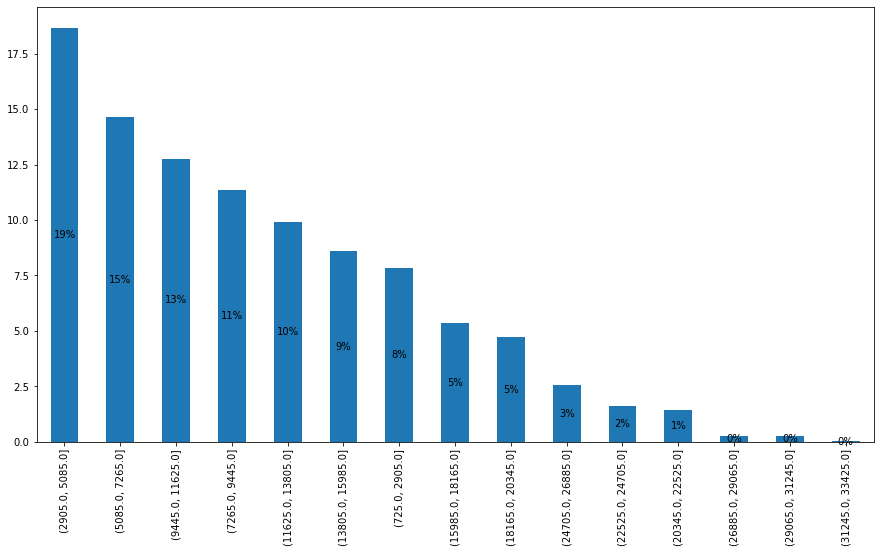

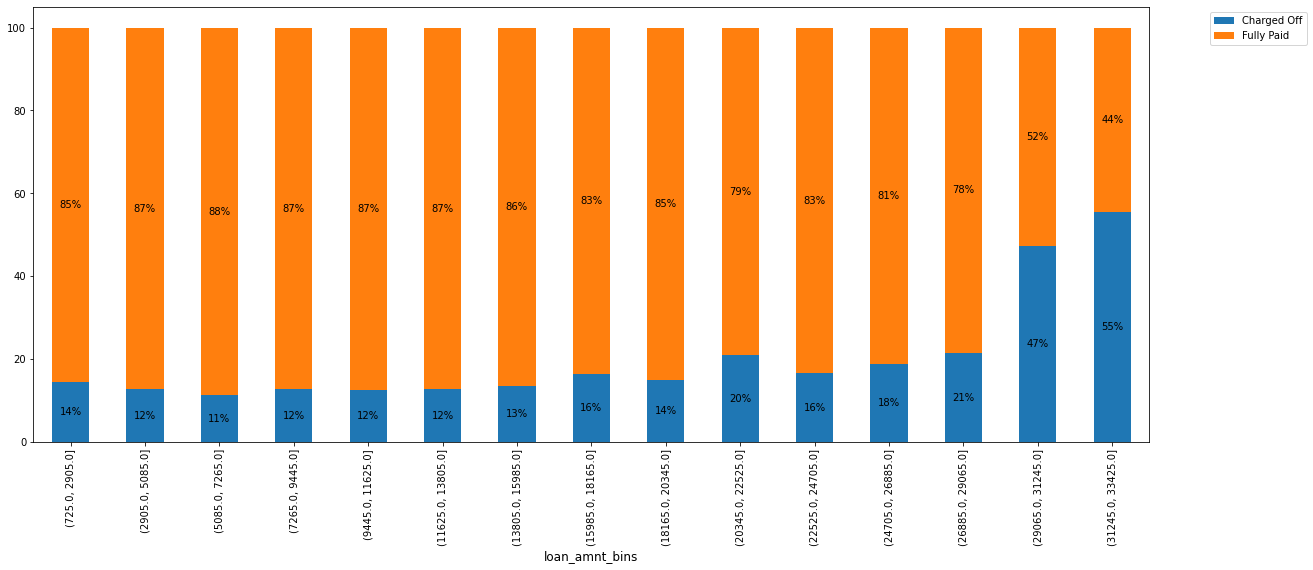

In [62]:
display_bar_chart(loan_num_df, 'loan_amnt_bins')

# Cross tabulation between Loan Status and loan_amnt_bins

display_stacked_bar_chart(loan_num_df, 'loan_amnt_bins')
plt.show()

#### Observation
1. Charge off percentage increased substancially for the loan amounts greater than 29k. It may be due to less number of applicants in this bucket.
2. Charge off percentage is increased from around 14% to 20% for the loan amounts above 20k. And even number of loan amounts in these buckets is also regionable (around 4%). Need to investigae this in bivariate analysis with annual income.

### Analysis on total_acc

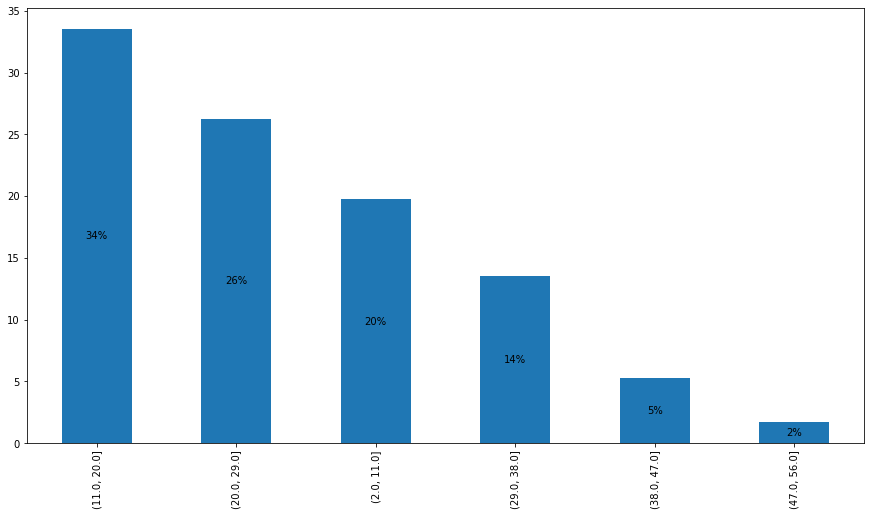

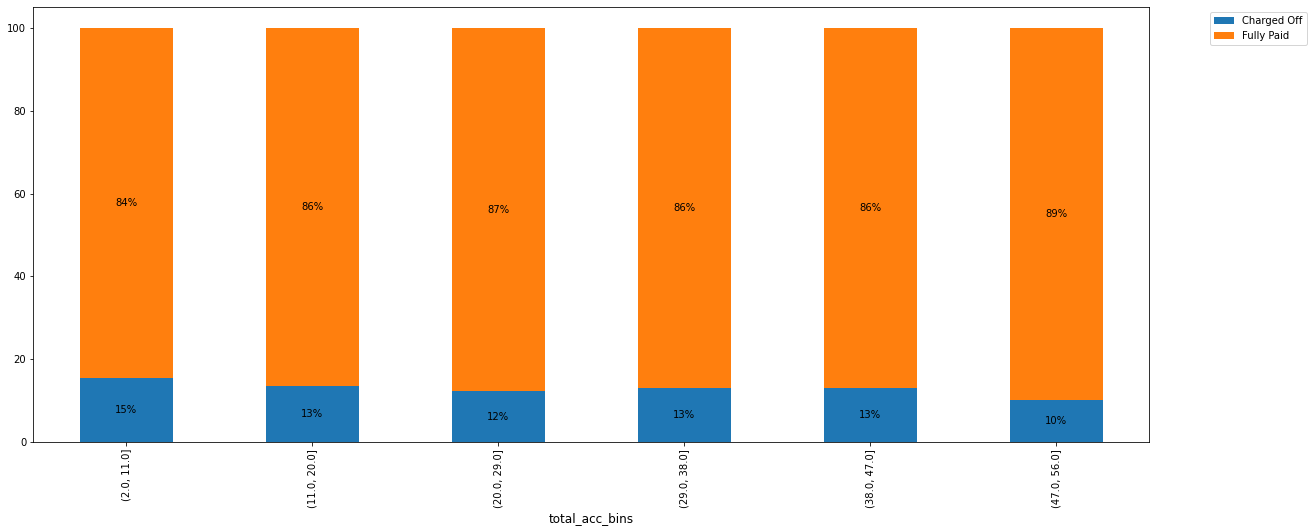

In [63]:
display_bar_chart(loan_num_df, 'total_acc_bins')

# Cross tabulation between Loan Status and total_acc_bins

display_stacked_bar_chart(loan_num_df, 'total_acc_bins')
plt.show()

#### Observation
1. For total accounts, distribution is almost same for applicants who are charged_off and fully_paid. So we can conclude that total accounts alone doesn't have any significance effect on loan_status

### Analysis on interest rate

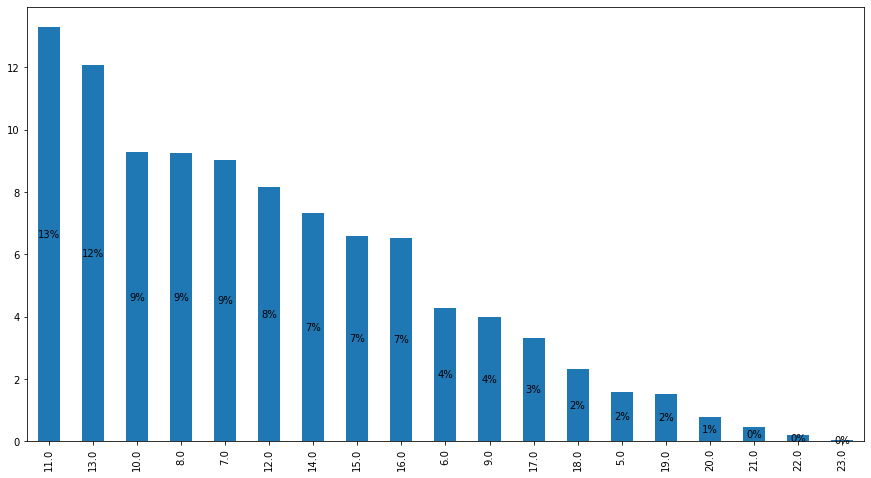

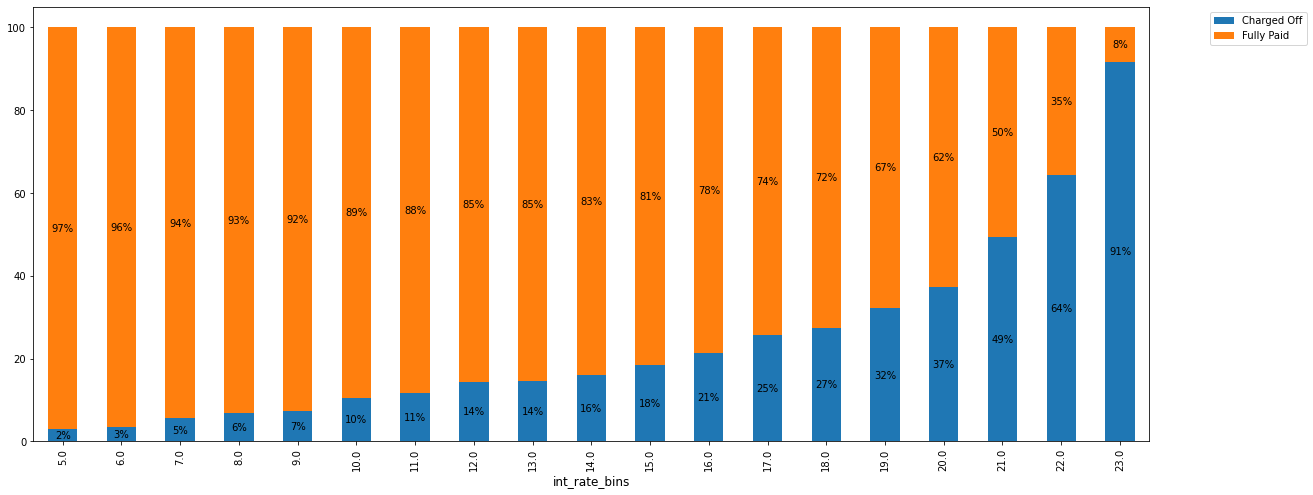

In [64]:
display_bar_chart(loan_num_df, 'int_rate_bins')

# Cross tabulation between Loan Status and int_rate_bins

display_stacked_bar_chart(loan_num_df, 'int_rate_bins')
plt.show()

#### Observation
1. As expected, interest rate on charged off applicants is more when compared to fully paid. This should happen as the default rate or risk increases interst rate should also increase. This shows that the company is moving in right direction

### Analysis on DTI

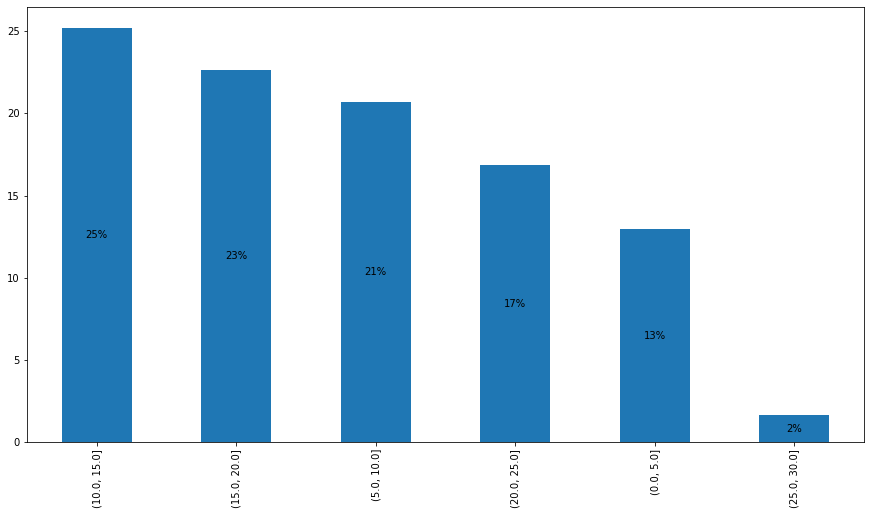

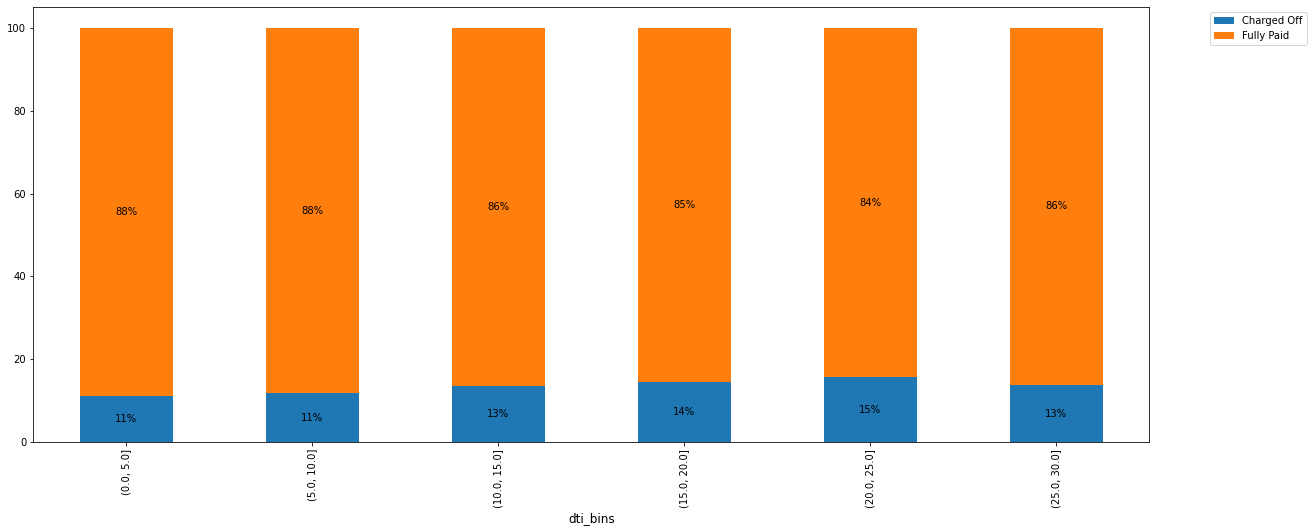

In [65]:
display_bar_chart(loan_num_df, 'dti_bins')

# Cross tabulation between Loan Status and int_rate_bins

display_stacked_bar_chart(loan_num_df, 'dti_bins')
plt.show()

### Observation
1. Ingorning last bucket where dti falls between 25 to 30 as the number of loans are less in this bucket, we can clearly notice that percentage of charge off is increating with increase in dti.

### Bivariate Analysis

### loan_ammount vs annual_income

/Users/skuppili/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


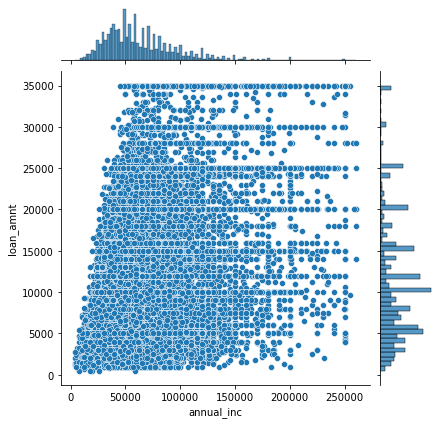

In [66]:
sb.jointplot('annual_inc', 'loan_amnt', loan_df.loc[loan_df['annual_inc']<=260000])
plt.show()

### Observation
1. There are few applicants whose loan amount above 25k but annual income is less than 50k. These applicants could be more risky. Lets see how percent of loan amounts to annual income has impact on loan default.

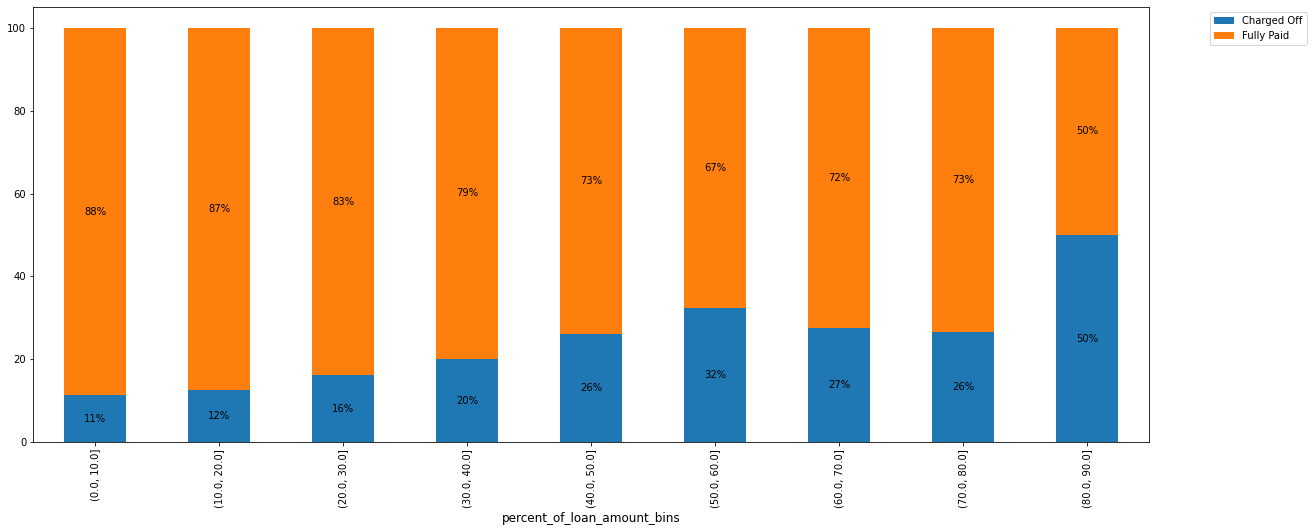

In [67]:
loan_df['percent_of_loan_amount'] = loan_df['loan_amnt'] * 100 / loan_df['annual_inc']

loan_df['percent_of_loan_amount_bins'] = pd.cut(loan_df['percent_of_loan_amount'], np.linspace(0, 100, 11))

# Cross tabulation between Loan Status and percent_of_loan_amount_bins

display_stacked_bar_chart(loan_df, 'percent_of_loan_amount_bins')
plt.show()

### int_rate vs pub_rec_bankruptcies

<AxesSubplot:title={'center':'int_rate (in %)'}, xlabel='pub_rec_bankruptcies'>

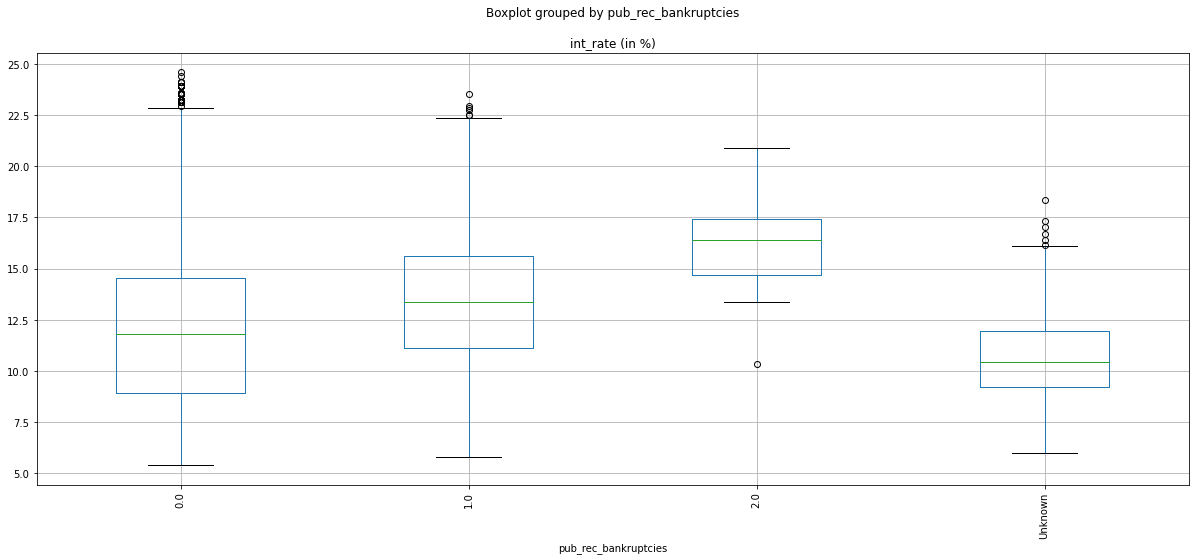

In [68]:
# Let see how company is issueing interst rate for applicants having pub_rec_bankruptcies

fig, ax = plt.subplots(figsize=(20,8))
loan_df.boxplot(column=['int_rate (in %)'], by='pub_rec_bankruptcies', ax=ax, rot=90)

#### Observation
1. As expected company is charging highest interest rate for applicants having previous record of bankruptcy.

### int_rate vs grade

<AxesSubplot:title={'center':'int_rate (in %)'}, xlabel='grade'>

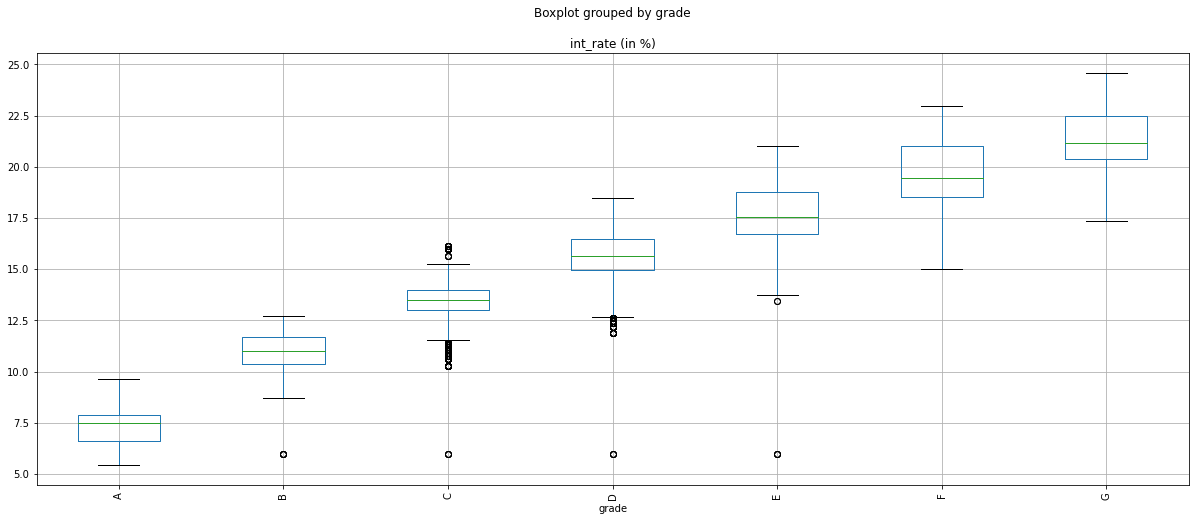

In [69]:
# Let see how company is issueing interst rate for applicants having Grades F and G

fig, ax = plt.subplots(figsize=(20,8))
loan_df.boxplot(column=['int_rate (in %)'], by='grade', ax=ax, rot=90)

#### Observation
1. As expected company is charging highest interest rate for applicants having grades F and G

### int_rate vs sub_grade

<AxesSubplot:title={'center':'int_rate (in %)'}, xlabel='sub_grade'>

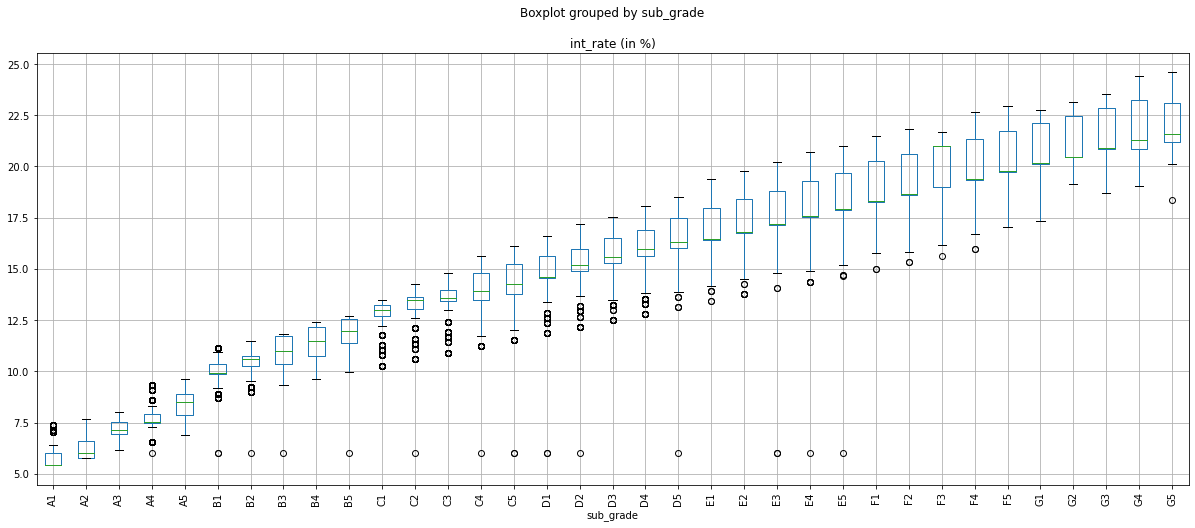

In [70]:
# Let see how company is issueing interst rate for applicants having Grades F and G

fig, ax = plt.subplots(figsize=(20,8))
loan_df.boxplot(column=['int_rate (in %)'], by='sub_grade', ax=ax, rot=90)

#### Observation
1. We can see that company is also doing the right thing with charging high interest rates for the grades falling the catogory of F and G.

### Multivariate analysis

### loan_amnt vs verification_status vs loan status

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

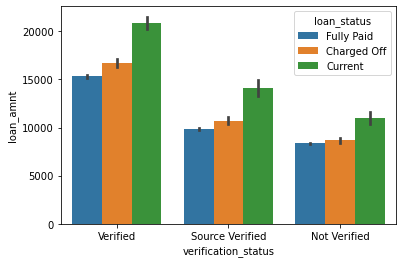

In [71]:
sb.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan_df)


### Observation
1. From the above result we can clearly see that loan amount is high for verified loans and we already observed that loans of higher amounts are more chances of charge off. May be because of that reaosn, company might be verifying higher loan amounts on priority. So higher charge of on verified loans is due to high loan amount.

<AxesSubplot:>

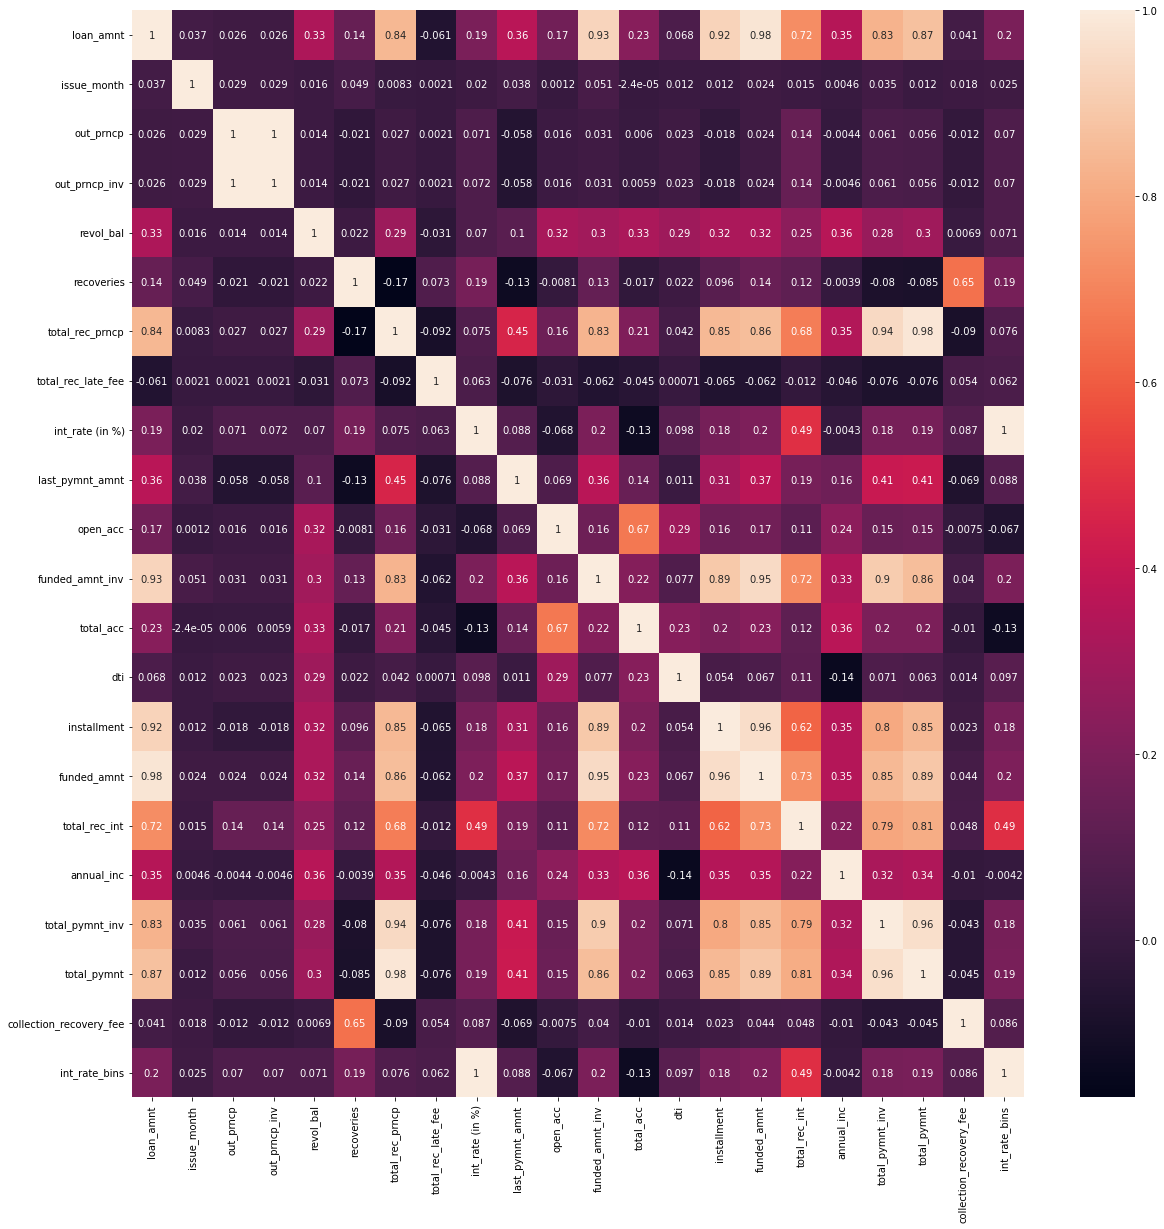

In [72]:
### Correlation matrix
plt.subplots(figsize=(20,20))
sb.heatmap(loan_num_df.corr(), annot=True)